In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import ipywidgets as widgets
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from ipywidgets import interact, IntSlider
from sklearn.datasets import fetch_lfw_people
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

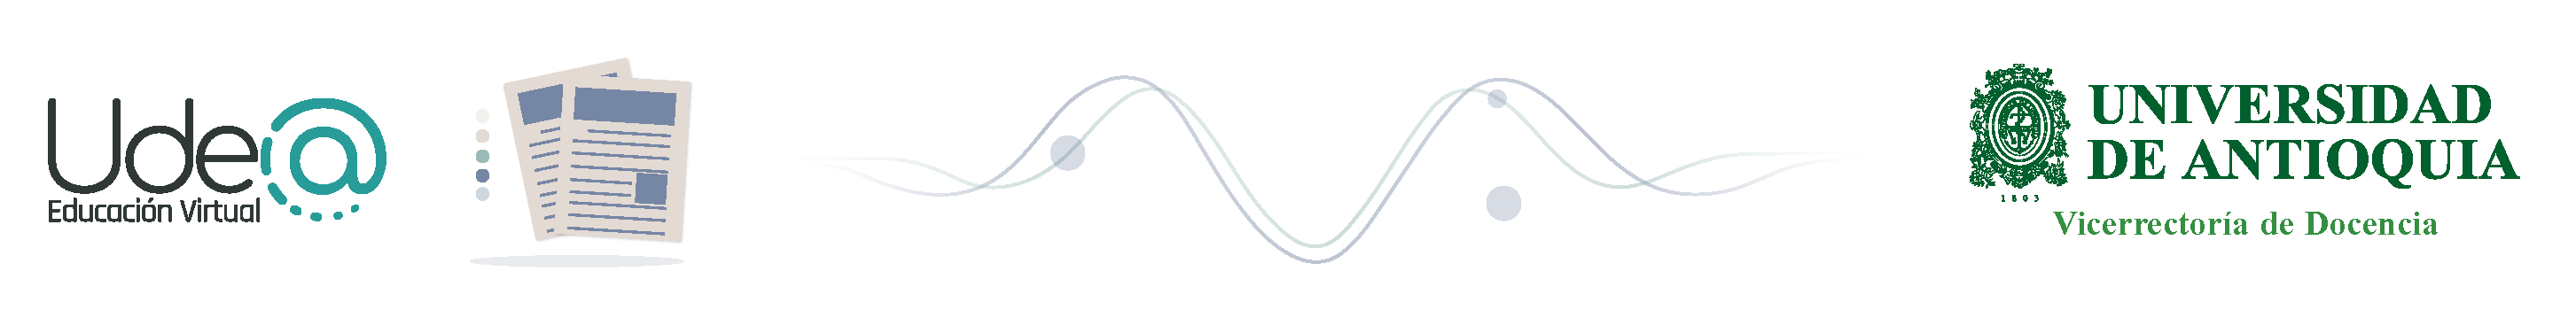

<div align="center">

#Mini-proyecto 2: Modelos de Variable Latente y Clasificadores Lineales para el Reconocimiento de Patrones

##Tratamiento de Señales III

Daniel Felipe Munoz Restrepo

Martin Alirio Barbosa Garzon 

###Facultad de Ingenierıa

###Universidad de Antioquia

###2023-1
</div>

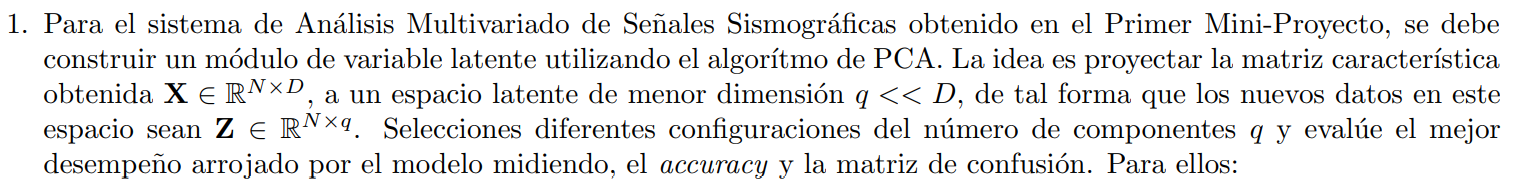

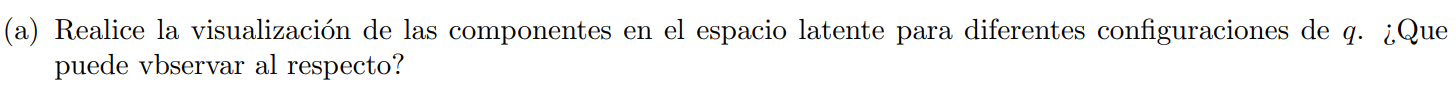

In [ ]:
#Inicialmente realizamos el cargue del csv como un objeto dataframe, y lo previsualizamos

ruta_sisTele = 'https://drive.google.com/file/d/16Mul4SQnPqmGYQa9tggG5hpJAfRRX8PP/view?usp=share_link'
!gdown  "16Mul4SQnPqmGYQa9tggG5hpJAfRRX8PP" -O 'data.csv'

df = pd.read_csv('data.csv', sep = ",")
df.head()

Downloading...
From: https://drive.google.com/uc?id=16Mul4SQnPqmGYQa9tggG5hpJAfRRX8PP
To: /content/data.csv
100% 72.7k/72.7k [00:00<00:00, 108MB/s]


Unnamed: 0        energy     max_power  max_power_freq  mean_spectrum  \
0           0  5.310861e-02  1.419932e-02        0.390625   3.046022e-04   
1           1  3.244844e-06  1.832449e-07        3.906250   5.284037e-06   
2           2  8.804790e-11  6.431583e-12        4.687500   3.225305e-08   
3           3  8.978237e-02  2.309679e-02        0.195312   3.120260e-04   
4           4  3.536772e-06  2.609267e-07        3.906250   3.617009e-06   

   var_spectrum  max_spectrum       entropy  min_spectrum  no_zero_crossings  \
0  7.792240e-06  3.205470e-03  2.358735e-05        8.5897              150.0   
1  4.242113e-10  5.961742e-05  4.607811e-07        8.5897              432.0   
2  1.080914e-14  3.264931e-07  2.796161e-09        8.5897              525.0   
3  1.332553e-05  3.891565e-03  8.251276e-06        8.5897              111.0   
4  5.492457e-10  5.447490e-05  7.573640e-08        8.5897              395.0   

   ...        n5           n25           n75       n95        median  \
0  ... -0.053306 -7.729353e-03  8.603073e-03  0.036545  3.591941e-04   
1  ... -0.000271 -9.981387e-05  9.876545e-05  0.000278  4.269650e-06   
2  ... -0.000002 -5.790571e-07  5.971022e-07  0.000002 -3.080832e-09   
3  ... -0.066823 -8.171886e-03  6.516919e-03  0.039791 -2.043158e-04   
4  ... -0.000154 -5.767317e-05  5.347476e-05  0.000157  3.033610e-06   

           mean       std           var           rms  TipoSismo  
0  1.179732e-03  0.054195  2.937069e-03  2.276029e-02     sisLoc  
1 -1.405955e-06  0.000403  1.623306e-07  1.543846e-04     sisLoc  
2 -4.690671e-09  0.000002  4.465228e-12  8.961387e-07     sisLoc  
3 -4.059479e-04  0.071588  5.124898e-03  2.902386e-02     sisLoc  
4  8.098535e-07  0.000414  1.710037e-07  1.002111e-04     sisLoc  

[5 rows x 21 columns]

In [ ]:
# Selecciona los datos
X = df.loc[:, df.columns != 'Unnamed: 0'].iloc[:, :-1].values

# Selecciona las etiquetas
y = df.iloc[:, -1].values

# Codifica las etiquetas a valores numéricos
le = LabelEncoder()
y = le.fit_transform(y)

# Normaliza los datos
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

In [ ]:
def plot_pca(n_components):
  
  # Crea el objeto PCA y establece el número de componentes a utilizar
  pca = PCA(n_components=n_components)

  # Transformar los datos al espacio latente
  X_latent = pca.fit_transform(X)

  # Convertir los datos transformados a un DataFrame
  column_names = ['PC{}'.format(i+1) for i in range(n_components)]
  column_names.append('label')
  df_latent = pd.DataFrame(np.column_stack((X_latent, df.iloc[:, -1].values)), columns=column_names)


  # Agregar la etiqueta al DataFrame
  df_latent['label'] = df.iloc[:, -1].values
  
  # Limpia la figura actual
  plt.clf()  

  # Visualizar con pairplot
  sns.pairplot(df_latent, hue='label')

# Crear widget interactivo
widgets.interact(plot_pca, n_components = np.arange(2, 20, 1))

Output hidden; open in https://colab.research.google.com to view.

Durante la etapa de análisis exploratorio de datos, utilizamos PCA para reducir la dimensionalidad de los datos y visualizamos los datos en un espacio latente de entre 1 y 19 dimensiones.

Al examinar las visualizaciones resultantes, notamos que los puntos que representan señales de sismos locales se encontraban dispersos en la periferia de las gráficas, mientras que los sismos locales y telesismos formaban una nube de puntos confusa en el centro de la figura. Esto puede ser un indicativo de que los sismos regionales o telesismos pueden presentar características similares que los hacen más difíciles de distinguir entre sí, lo cual podría afectar la precisión de los modelos de clasificación que entrenaremos más adelante.

Es importante mencionar que, en el miniproyecto 1, se identificaron características que permitían aislar cada tipo de sismo de manera más clara que en esta representación del espacio latente. Por lo tanto, es posible que debamos explorar con la transformacion a espacio latente de una menor cantidad de caracteristicas para lograr obtener mejor rendimiento de los modelos.

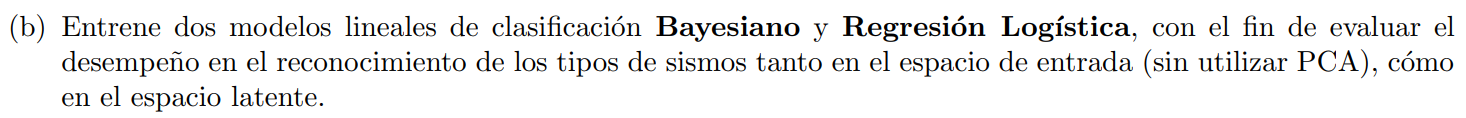

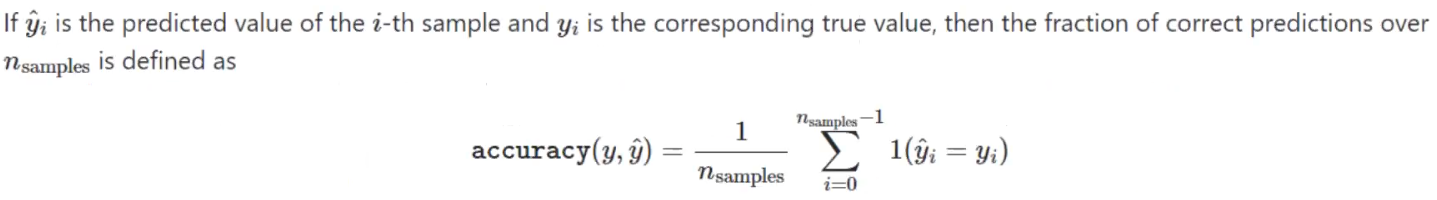



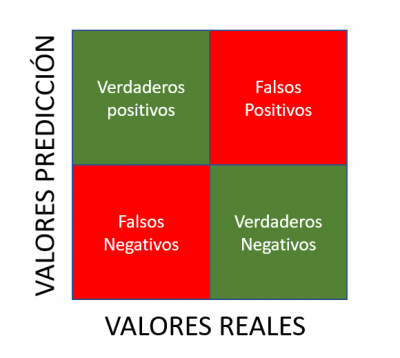

In [ ]:
def train_test_split_and_fit(X_col, test_size):
  # Particionar los datos en conjuntos de entrenamiento y prueba
  X_train, X_test, y_train, y_test = train_test_split(X[:, :X_col], y, test_size=test_size, random_state=42)

  # Entrenar el clasificador Bayesiano
  clfNB = GaussianNB()
  clfNB.fit(X_train, y_train)

  # Entrenar el clasificador de regresión logística
  clfLR = LogisticRegression(random_state=0, max_iter=2000)
  clfLR.fit(X_train, y_train)

  # Realizar predicciones
  y_pred_testNB = clfNB.predict(X_test)
  y_pred_testLR = clfLR.predict(X_test)

  # Calcular la exactitud de los clasificadores
  accTest_NB = accuracy_score(y_test, y_pred_testNB)
  accTest_LR = accuracy_score(y_test, y_pred_testLR)

  print(f'El accuracy para el clasificador Bayesiano es: {accTest_NB} y para el clasificado de Regresion Logistica es: {accTest_LR}')

  # Mostrar la matriz de confusión para el clasificador Bayesiano
  cmNB = confusion_matrix(y_test, y_pred_testNB)
  fig, ax = plt.subplots(figsize=(5, 4))
  disp = ConfusionMatrixDisplay(confusion_matrix=cmNB, display_labels=df['TipoSismo'].unique() )
  disp.plot(ax=ax)
  plt.title('Matriz de confusión - Clasificador Bayesiano')
  plt.show()

  # Mostrar la matriz de confusión para el clasificador de regresión logística
  cmLR = confusion_matrix(y_test, y_pred_testLR)
  fig, ax = plt.subplots(figsize=(5, 4))
  disp = ConfusionMatrixDisplay(confusion_matrix=cmLR, display_labels=df['TipoSismo'].unique() )
  disp.plot(ax=ax)
  plt.title('Matriz de confusión - Clasificador Regresión Logística')
  plt.show()

# Crear los widgets
X_col_widget = widgets.IntSlider(value=4, min=1, max=X.shape[1], step=1, description='CantCaracteristicas:')
test_size_widget = widgets.FloatSlider(value=0.3, min=0.1, max=0.5, step=0.1, description='test_size:')

# Crear la función interactiva
interactive_func = widgets.interactive(train_test_split_and_fit, X_col=X_col_widget, test_size=test_size_widget)

# Mostrar la interfaz gráfica
display(interactive_func)

interactive(children=(IntSlider(value=4, description='CantCaracteristicas:', max=19, min=1), FloatSlider(value…

En este punto, hemos entrenado los dos modelos de clasificación (Bayesiano y Regresión Logística) con el conjunto de datos completo que contiene 19 características. Posteriormente, procedimos a evaluar el desempeño de ambos modelos y encontramos una precisión del 98% y 86%, respectivamente, para cada uno de ellos. Observamos que el modelo Bayesiano ofreció un mejor rendimiento y confiabilidad en este caso particular.

Aunque la segmentación de características no es el objetivo principal de este miniproyecto, gracias a la exploración realizada, pudimos generar una función interactiva que nos permitió identificar que el modelo maximiza su rendimiento al utilizar las primeras 8 características del conjunto de datos, alcanzando una precisión del 100% y 98% para cada modelo de clasificación, respectivamente. A partir de esto, podemos concluir que las características 9-19 podrían no estar aportando información valiosa en la distinción de los modelos y, en su lugar, podrían estar presentando un comportamiento de ruido que está afectando el desempeño de los modelos.

In [ ]:
def train_test_split_and_fit_latente(n_components, test_size):
  # Aplicar PCA a las características
  pca = PCA(n_components=n_components)
  X_pca = pca.fit_transform(X)

  # Dividir los datos reducidos en características y etiquetas en conjuntos de entrenamiento y prueba utilizando train_test_split()
  X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

  # Entrenar el clasificador Bayesiano
  clfNB = GaussianNB()
  clfNB.fit(X_train, y_train)

  # Entrenar el clasificador de regresión logística
  clfLR = LogisticRegression(random_state=0, max_iter=2000)
  clfLR.fit(X_train, y_train)

  # Realizar predicciones
  y_pred_testNB = clfNB.predict(X_test)
  y_pred_testLR = clfLR.predict(X_test)

  # Calcular la exactitud de los clasificadores
  accTest_NB = accuracy_score(y_test, y_pred_testNB)
  accTest_LR = accuracy_score(y_test, y_pred_testLR)

  print(f'El accuracy para el clasificador Bayesiano es: {accTest_NB} y para el clasificador de Regresión Logística es: {accTest_LR}')

  # Mostrar la matriz de confusión para el clasificador Bayesiano
  cmNB = confusion_matrix(y_test, y_pred_testNB)
  fig, ax = plt.subplots(figsize=(5, 4))
  disp = ConfusionMatrixDisplay(confusion_matrix=cmNB, display_labels=df['TipoSismo'].unique() )
  disp.plot(ax=ax)
  plt.title('Matriz de confusión - Clasificador Bayesiano')
  plt.show()

  # Mostrar la matriz de confusión para el clasificador de regresión logística
  cmLR = confusion_matrix(y_test, y_pred_testLR)
  fig, ax = plt.subplots(figsize=(5, 4))
  disp = ConfusionMatrixDisplay(confusion_matrix=cmLR, display_labels=df['TipoSismo'].unique() )
  disp.plot(ax=ax)
  plt.title('Matriz de confusión - Clasificador Regresión Logística')
  plt.show()

# Crear los widgets
n_components_widget = widgets.IntSlider(value=4, min=1, max=X.shape[1], step=1, description='CantCaracteristicas:')
test_size_widget = widgets.FloatSlider(value=0.3, min=0.1, max=0.5, step=0.1, description='test_size:')

# Crear la función interactiva
interactive_func = widgets.interactive(train_test_split_and_fit_latente, n_components=n_components_widget, test_size=test_size_widget)

# Mostrar la interfaz gráfica
display(interactive_func)

interactive(children=(IntSlider(value=4, description='CantCaracteristicas:', max=19, min=1), FloatSlider(value…

En esta etapa, realizamos el mismo proceso de entrenamiento pero utilizando la proyección a espacio latente de las características con el fin de reducir la dimensionalidad del conjunto de datos, manteniendo la mayor cantidad posible de información relevante. La finalidad de este proceso es obtener un buen rendimiento de los modelos de clasificación con menos características, lo que reduciría el costo computacional del modelo, mejoraría su eficiencia y aumentaría su capacidad de generalización.

Luego de experimentar con diferentes números de componentes, encontramos que al usar entre 7 componentes, las precisiones de ambos modelos es de 82% y 88% respectivamente, valores muy aceptables teniendo en cuenta que estamos usando menos de la mitad de la totalidad de las características, luego de este punto no se evidencia mejoria al usar mas componentes.

Finalmente, decidimos entrenar el modelo utilizando solo las primeras 8 características que maximizaron el rendimiento en el paso anterior. El desarrollo de este proceso se presenta a continuación.

In [ ]:
def train_test_split_and_fit_latente(n_components, test_size):
  # Aplicar PCA a las características
  pca = PCA(n_components=n_components)
  X_pca = pca.fit_transform(X[:,:8])

  # Dividir los datos reducidos en características y etiquetas en conjuntos de entrenamiento y prueba utilizando train_test_split()
  X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

  # Entrenar el clasificador Bayesiano
  clfNB = GaussianNB()
  clfNB.fit(X_train, y_train)

  # Entrenar el clasificador de regresión logística
  clfLR = LogisticRegression(random_state=0, max_iter=2000)
  clfLR.fit(X_train, y_train)

  # Realizar predicciones
  y_pred_testNB = clfNB.predict(X_test)
  y_pred_testLR = clfLR.predict(X_test)

  # Calcular la exactitud de los clasificadores
  accTest_NB = accuracy_score(y_test, y_pred_testNB)
  accTest_LR = accuracy_score(y_test, y_pred_testLR)

  print(f'El accuracy para el clasificador Bayesiano es: {accTest_NB} y para el clasificador de Regresión Logística es: {accTest_LR}')

  # Mostrar la matriz de confusión para el clasificador Bayesiano
  cmNB = confusion_matrix(y_test, y_pred_testNB)
  fig, ax = plt.subplots(figsize=(5, 4))
  disp = ConfusionMatrixDisplay(confusion_matrix=cmNB, display_labels=df['TipoSismo'].unique() )
  disp.plot(ax=ax)
  plt.title('Matriz de confusión - Clasificador Bayesiano')
  plt.show()

  # Mostrar la matriz de confusión para el clasificador de regresión logística
  cmLR = confusion_matrix(y_test, y_pred_testLR)
  fig, ax = plt.subplots(figsize=(5, 4))
  disp = ConfusionMatrixDisplay(confusion_matrix=cmLR, display_labels=df['TipoSismo'].unique() )
  disp.plot(ax=ax)
  plt.title('Matriz de confusión - Clasificador Regresión Logística')
  plt.show()

# Crear los widgets
n_components_widget = widgets.IntSlider(value=4, min=1, max=8, step=1, description='CantCaracteristicas:')
test_size_widget = widgets.FloatSlider(value=0.3, min=0.1, max=0.5, step=0.1, description='test_size:')

# Crear la función interactiva
interactive_func = widgets.interactive(train_test_split_and_fit_latente, n_components=n_components_widget, test_size=test_size_widget)

# Mostrar la interfaz gráfica
display(interactive_func)

interactive(children=(IntSlider(value=4, description='CantCaracteristicas:', max=8, min=1), FloatSlider(value=…

Para este ejercicio final, entrenamos el modelo proyectando el espacio latente únicamente con un máximo de 8 componentes, las primeras 8 que nos brindaron un rendimiento tan sobresaliente en uno de los pasos anteriores. Para nuestra sorpresa, se confirmó la utilidad de usar PCA en el entrenamiento de nuestros algoritmos de clasificación, ya que con el uso de solo dos componentes logramos una precisión del modelo del 100% para ambos modelos, un rendimiento perfecto con tan pocas componentes. Esto confirmaría una de las especulaciones que planteamos al inicio acerca de que estas primeras 8 características son posiblemente las más relevantes y permiten diferenciar los diferentes tipos de sismo, mientras que las demás están teniendo un comportamiento más como de ruido. Una posible causa es que estas estén más correlacionadas entre sí.

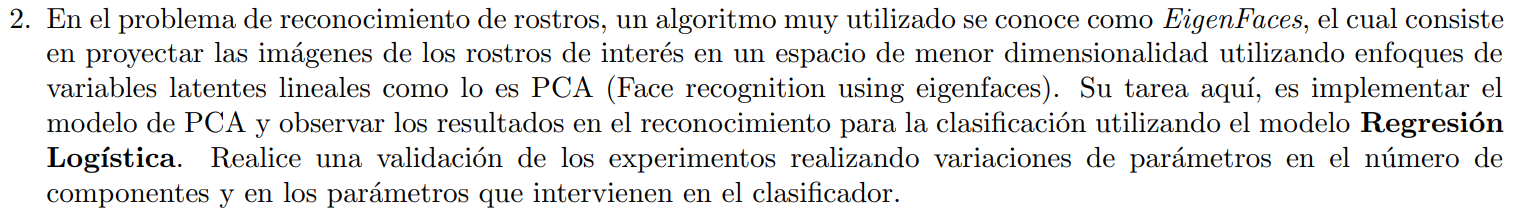

Inicialmente implementamos el modelo de regresión logística utilizando todo el conjunto de datos de las imágenes sin realizar PCA, y analizaremos el rendimiento del modelo.

In [ ]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
# the label to predict is the id of the person
y = lfw_people.target

# Particionar los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar el clasificador de regresión logística
clfLR = LogisticRegression(random_state=0, max_iter=2000)
clfLR.fit(X_train, y_train)

# Realizar predicciones
y_pred_testLR = clfLR.predict(X_test)

# Calcular la exactitud de los clasificadores
accTest_LR = accuracy_score(y_test, y_pred_testLR)

El accuracy para el clasificador de Regresion Logistica es: 0.8217054263565892


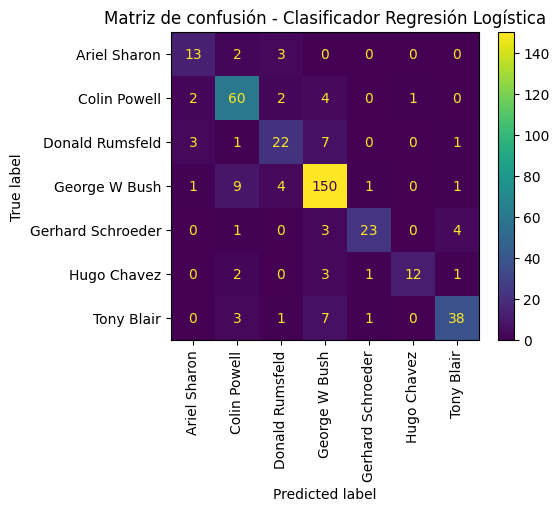

In [ ]:
print(f'El accuracy para el clasificador de Regresion Logistica es: {accTest_LR}')

# Mostrar la matriz de confusión para el clasificador de regresión logística
cmLR = confusion_matrix(y_test, y_pred_testLR)
fig, ax = plt.subplots(figsize=(5, 4))
disp = ConfusionMatrixDisplay(confusion_matrix=cmLR, display_labels=lfw_people.target_names)
disp.plot(ax=ax, xticks_rotation=90)
plt.title('Matriz de confusión - Clasificador Regresión Logística')
plt.show()

El accuracy obtenido de 0.8217 puede considerarse razonablemente bueno para un modelo de regresión logística en este tipo de problemas. Sin embargo, vamos a proceder a entrenar el mismo clasificador utilizando Eigen Faces para evaluar si el rendimiento del modelo mejora.

Las Eigen Faces son una representación de las variaciones más importantes en la apariencia facial que se pueden encontrar en un conjunto de imágenes de rostros. Estas variaciones se obtienen a través del PCA, que es una técnica de reducción de la dimensionalidad que permite encontrar las combinaciones lineales de las variables originales que mejor expliquen la variabilidad en los datos.

In [ ]:
@interact(n_components=IntSlider(min=0, max=1140, step=5, value=180))
def pca_classification(n_components):
  # Cargar datos
  lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

  # introspect the images arrays to find the shapes (for plotting)
  n_samples, h, w = lfw_people.images.shape

  # for machine learning we use the 2 data directly (as relative pixel
  # positions info is ignored by this model)
  X = lfw_people.data
  n_features = X.shape[1]

  # the label to predict is the id of the person
  y = lfw_people.target
  target_names = lfw_people.target_names
  n_classes = target_names.shape[0]

  print("Total dataset size:")
  print("n_samples: %d" % n_samples)
  print("n_features: %d" % n_features)
  print("n_classes: %d" % n_classes)

  pca = PCA(n_components=n_components)
  X_pca = pca.fit_transform(X)

  eigenfaces = pca.components_.reshape((n_components, h, w))

  X_train, X_test, y_train, y_test = train_test_split(
      X_pca, y, test_size=0.3, random_state=42
  )

  clf = LogisticRegression(random_state=42, max_iter=2000)
  clf.fit(X_train, y_train)

  y_pred = clf.predict(X_test)

  # print(
  #     classification_report(
  #         y_test, y_pred, target_names=target_names
  #     )
  # )

  # Calcular la exactitud de los clasificadores
  accTest = accuracy_score(y_test, y_pred)

  print(f'El accuracy para el clasificador de Regresion Logistica es: {accTest}')

  # Mostrar la matriz de confusión para el clasificador de regresión logística
  cmLR = confusion_matrix(y_test, y_pred)
  fig, ax = plt.subplots(figsize=(5, 4))
  disp = ConfusionMatrixDisplay(confusion_matrix=cmLR, display_labels=target_names)
  disp.plot(ax=ax, xticks_rotation=90)
  plt.title('Matriz de confusión - Clasificador Regresión Logística')
  plt.show()

interactive(children=(IntSlider(value=180, description='n_components', max=1140, step=5), Output()), _dom_clas…

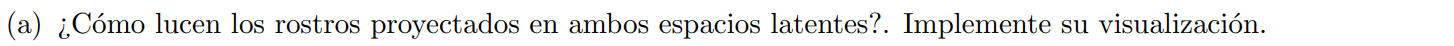

In [ ]:
@interact(n_components=IntSlider(min=0, max=1140, step=5, value=910))
def pca_classification(n_components):
  lfw_people = fetch_lfw_people(min_faces_per_person=125, resize=0.4)

  # introspect the images arrays to find the shapes (for plotting)
  n_samples, h, w = lfw_people.images.shape

  # for machine learning we use the 2 data directly (as relative pixel
  # positions info is ignored by this model)
  X = lfw_people.data
  n_features = X.shape[1]

  # the label to predict is the id of the person
  y = lfw_people.target
  target_names = lfw_people.target_names
  n_classes = target_names.shape[0]

  print("Total dataset size:")
  print("n_samples: %d" % n_samples)
  print("n_features: %d" % n_features)
  print("n_classes: %d" % n_classes)

  pca = PCA(n_components=n_components).fit(X)

  eigenfaces = pca.components_.reshape((n_components, h, w))

  print("Projecting the input data on the eigenfaces orthonormal basis")
  X_pca = pca.transform(X)

  def plot_gallery(images, titles, h, w, n_row=None, n_col=None):
      """Helper function to plot a gallery of portraits"""
      n_images = len(images)
      if n_row is None and n_col is None:
          # Determine the number of rows and columns based on the number of images
          n_row = int(np.sqrt(n_images))
          n_col = int(np.ceil(n_images / n_row))
      elif n_row is None:
          # Determine the number of rows based on the number of columns
          n_col = min(n_col, n_images)
          n_row = int(np.ceil(n_images / n_col))
      elif n_col is None:
          # Determine the number of columns based on the number of rows
          n_row = min(n_row, n_images)
          n_col = int(np.ceil(n_images / n_row))

      plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
      plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)
      for i in range(n_row * n_col):
          if i < n_images:
              plt.subplot(n_row, n_col, i + 1)
              plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
              plt.title(titles[i], size=12)
              plt.xticks(())
              plt.yticks(())
          else:
              # Leave blank space for any missing images
              plt.subplot(n_row, n_col, i + 1)
              plt.axis('off')
      plt.show()


  eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
  plot_gallery(eigenfaces, eigenface_titles, h, w)

  plt.show()


interactive(children=(IntSlider(value=910, description='n_components', max=1140, step=5), Output()), _dom_clas…

Del análisis del gráfico, se puede observar que progresivamente se van detectando las zonas faciales en las primeras tres eigenfaces, seguido de detalles de grandes cambios como los ojos y la boca, y al seguir aumentando las componentes, aparecen detalles más finos como las cejas, el grosor de los labios y la forma del contorno alrededor de la boca. Además, se observa que se hacen evidentes otras marcas faciales como las arrugas alrededor de los ojos y detalles únicos de cada rostro. Este resultado confirma la teoría de que el número de componentes está relacionado con la cantidad de características relevantes que se conservan de las imágenes originales.

Sin embargo, al llegar a entre 250 y 300 componentes, la imagen comienza a llenarse de ruido y los detalles de los rostros comienzan a perderse. Es importante destacar que esto puede deberse a factores como el ruido en los datos, la falta de calidad en las imágenes o la falta de variabilidad en los datos. A pesar de esto, se confirmó que el modelo exhibe un comportamiento muy sobresaliente para clasificar los rostros con menos de 200 componentes, lo que disminuye significativamente la cantidad de características y entrega una precisión muy buena.

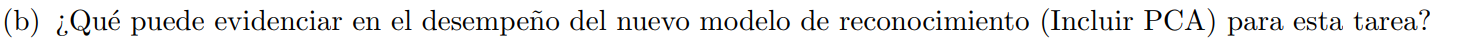

In [ ]:
# Cargar datos
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
y = lfw_people.target

# Inicializar lista para guardar resultados
results = []

# Loop para probar diferentes valores de n_components
for n in range(4, 1288, 4):

    # Hacer PCA con n_components
    pca = PCA(n_components=n)
    X_pca = pca.fit_transform(X)

    # Dividir datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(
        X_pca, y, test_size=0.3, random_state=42
    )

    # Entrenar clasificador de regresión logística
    clf = LogisticRegression(random_state=42, max_iter=2000)
    clf.fit(X_train, y_train)

    # Predecir etiquetas para datos de prueba
    y_pred = clf.predict(X_test)

    # Calcular y guardar accuracy
    acc = accuracy_score(y_test, y_pred)
    results.append((n, acc))

# Crear dataframe con resultados
df_results = pd.DataFrame(results, columns=["n_components", "accuracy"])

# Mostrar dataframe
print(df_results)

     n_components  accuracy
0               4  0.410853
1               8  0.472868
2              12  0.511628
3              16  0.594315
4              20  0.627907
..            ...       ...
316          1268  0.821705
317          1272  0.821705
318          1276  0.821705
319          1280  0.821705
320          1284  0.821705

[321 rows x 2 columns]


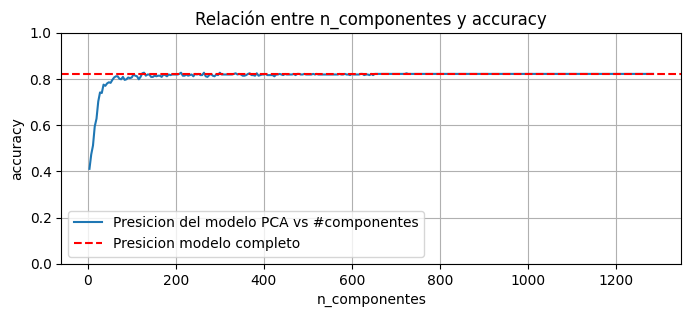

Máxima precisión: 82.69% para n_components = 128


In [ ]:
# Graficar los resultados
plt.figure(figsize=(8,3))
plt.plot(df_results['n_components'], df_results['accuracy'], label = 'Presicion del modelo PCA vs #componentes')
plt.title('Relación entre n_componentes y accuracy')
plt.axhline(y=0.8217054263565892, linestyle='--', color='r', label = 'Presicion modelo completo')
plt.xlabel('n_componentes')
plt.ylabel('accuracy')
plt.ylim(0, 1)
plt.legend()
plt.grid()
plt.show()

max_accuracy = df_results["accuracy"].max()
best_n_components = df_results.loc[df_results["accuracy"].idxmax(), "n_components"]
print("Máxima precisión: {:.2f}% para n_components = {}".format(max_accuracy*100, best_n_components))

df_results.to_csv("acuracyEigenFaces.csv")

El método de Eigenfaces con PCA tiene un rendimiento sobresaliente. Podemos observar que con solo 128 componentes, en comparación con las más de mil características usadas en el modelo sin PCA, se logra una precisión del 82.69%, frente al 82.2% del modelo sin PCA. Es decir, logramos una mejor precisión con muchas menos componentes. Por lo tanto, se decidió realizar una iteración donde gradualmente se aumentaría el número de componentes, y se guardaría la precisión en cada incremento.

El resultado se puede ver en la gráfica anterior, donde se muestra el comportamiento de la precisión a medida que aumenta el número de componentes. También se muestra en color rojo la precisión lograda por el modelo sin PCA. La gráfica corrobora nuestro análisis acerca de cómo lucen los rostros en el espacio latente. A medida que aumentamos las componentes, los rostros comenzaban a perder definición después de cierto punto. Ya no se apreciaban tantos detalles, y posteriormente, la forma del rostro se perdía y todo se veía como una especie de espiral. De esta manera, la gráfica nos muestra cómo el aumento de componentes llega a un punto donde no mejora el rendimiento porque no aporta más información valiosa. Lo veíamos en la gráfica de los rostros con más de 250 componentes, donde ya no había detalles visibles.

Consideramos que si realizamos un análisis de selección de las mejores características, entrenamos y transformamos a PCA solo con las más relevantes, se lograría potenciar las virtudes de este algoritmo y mejorar la precisión con incluso menos componentes. Realmente es un algoritmo muy poderoso.

En base al análisis del presente trabajo podemos resaltar en PCA:

Reducción de dimensionalidad: PCA ayuda a reducir la dimensionalidad de los datos de entrada. En el caso de imágenes, los datos de entrada pueden tener una gran cantidad de características, lo que hace que sea difícil entrenar un modelo con alta precisión. PCA permite seleccionar solo las características más importantes, lo que puede mejorar la precisión del modelo.
Eliminación de información redundante: La reducción de dimensionalidad también puede ayudar a eliminar información redundante en los datos de entrada. En el caso de imágenes, muchas características pueden estar altamente correlacionadas entre sí. PCA puede identificar estas correlaciones y seleccionar solo una característica que represente esa información, lo que puede mejorar la precisión del modelo.
Selección de las características más importantes: PCA identifica las características que explican la mayor cantidad de variabilidad en los datos. Estas características son las que se usan para construir las "eigenfaces". Las eigenfaces representan las características más importantes de las imágenes y se pueden usar para clasificar las caras con alta precisión.
Reducción del ruido: PCA también puede reducir el ruido en los datos de entrada. Las eigenfaces se construyen a partir de una combinación lineal de las características de las imágenes, lo que puede ayudar a eliminar el ruido en los datos.

NOTA ADICIONAL:

Al revisar cuidadosamente el notebook facilitado por el docente, tomamos dos decisiones:

No usar el orden de los pasos de partir el conjunto de datos para luego aplicar PCA, sino aplicar PCA y luego partir los datos, según lo conversado en una de las tutorías.

Investigamos acerca de los dos parámetros que se le pasaban al instanciar el objeto PCA, que son "svd_solver=randomized" y "whiten=True". Encontramos que "whiten=True" se encarga de normalizar las características y que cada una tenga el mismo peso. Decidimos eliminar este parámetro debido a que, en una tutoría, el docente manifestó que para este proyecto no era necesario. Con respecto al parámetro "svd_solver=randomized", encontramos que se usa para indicar que se utilizará un algoritmo de SVD aleatorio para la descomposición, que puede ser más rápido en grandes conjuntos de datos que el algoritmo exacto. Nuevamente, tomamos la decisión de no usar este parámetro por dos razones: primero, encontramos que cada vez que corremos los algoritmos de Eigenfaces, nos daban precisiones diferentes y, segundo, se encontró que al aumentar las componentes de PCA, el algoritmo perdía mucha precisión. Entendemos que es por la naturaleza de solución del algoritmo de SVD. Por estas razones, no usamos esos dos parámetros.